### 1. Imports and Configuration

In [1]:
from dotenv import load_dotenv
import os
import pandas as pd
from openai import OpenAI
from data_loader import load_resumes, load_or_generate_ats_results, run_or_load_oneshot_evaluation
from main_config import RESUME_FILE_PATH, JOB_DESCRIPTION, ATS_RESULTS_PATH, WEBSITE_RESULTS_PATH, ONESHOT_RESULTS_PATH, ATS_CACHED_RESULTS_PATH
import matplotlib.pyplot as plt
import seaborn as sns
from oneshot import evaluate_all_oneshot_resumes
from analysis import (
    normalize_scores,
    load_and_rank,
    sort_project_results,
    load_website_results,
    compare_ranks,
    print_ranking_comparison,
    plot_rank_scatter,
    plot_normalized_score_comparison_all,
    plot_ranks_by_resume_scatter,
    plot_featurewise_correlation,
    merge_all_ranks
)

### 2. API Client Setup

In [2]:
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(api_key=api_key)

### 3. Load Resume Data

In [3]:
resumes = load_resumes(RESUME_FILE_PATH)
job_description = JOB_DESCRIPTION

### 4. Run ToT Logic 
Depending on if you want to generate new data or not, you can set the force_rerun to T or F. The purpose of this is to be able to run the program with data already gathered from calling ChatGPT if you do not have an API Key.

In [4]:
# Populate the ats_results df using the ToT Program
ats_results = load_or_generate_ats_results(
    resumes,
    job_description,
    load_path=ATS_CACHED_RESULTS_PATH,
    save_path=ATS_RESULTS_PATH,
    force_rerun=False  # set to True if you want to regenerate from scratch
)
ats_results.to_excel("ATS_Results.xlsx", index=False)

[INFO] Loaded cached ATS results from ATS_Results_Stored.xlsx


### 8. Run One-Shot Logic

In [5]:
oneshot_results = run_or_load_oneshot_evaluation(resumes, job_description, use_cache=True)

[INFO] Loaded cached One-Shot results from Oneshot_Results_Stored.xlsx


### 7. Load And Compare Final Results

In [ ]:
# Load and rank all three systems
website_df = load_and_rank(WEBSITE_RESULTS_PATH, "website")
tot_df = load_and_rank(ATS_RESULTS_PATH, "tot")
oneshot_df = load_and_rank(ONESHOT_RESULTS_PATH, "oneshot")

# Merge and compare dataframes
ranking_comparison_df = merge_all_ranks(website_df, tot_df, oneshot_df, resume_count=10)

# Print side-by-side ranks and agreements
print_ranking_comparison(ranking_comparison_df)

# Save comparison to Excel
ranking_comparison_df.to_excel("rank_comparison_output.xlsx", index=False)


 Ranking Comparison (All Methods):
   id  website_rank  tot_rank  oneshot_rank
0   1             6         2             5
1   2             8         6             8
2   3             7         3             6
3   4             2         1             2
4   5             3         4             7
5   6             1         7             4
6   7             4         9             3
7   8             5         5             1
8   9             9         8             9
9  10            10        10            10


### 9. Data Visualization

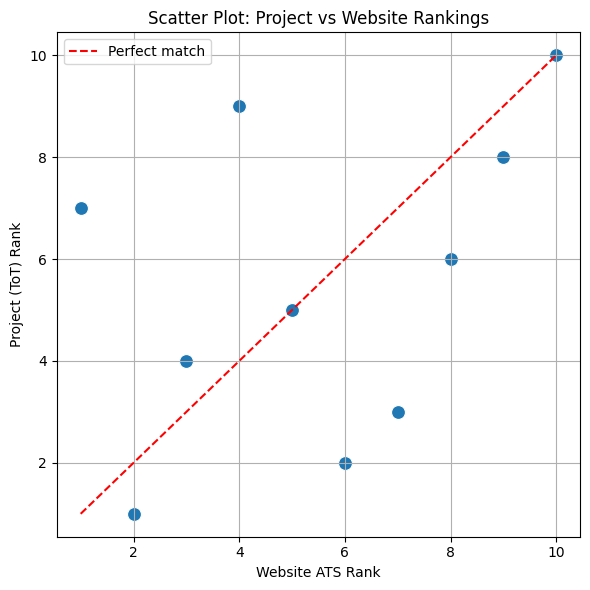

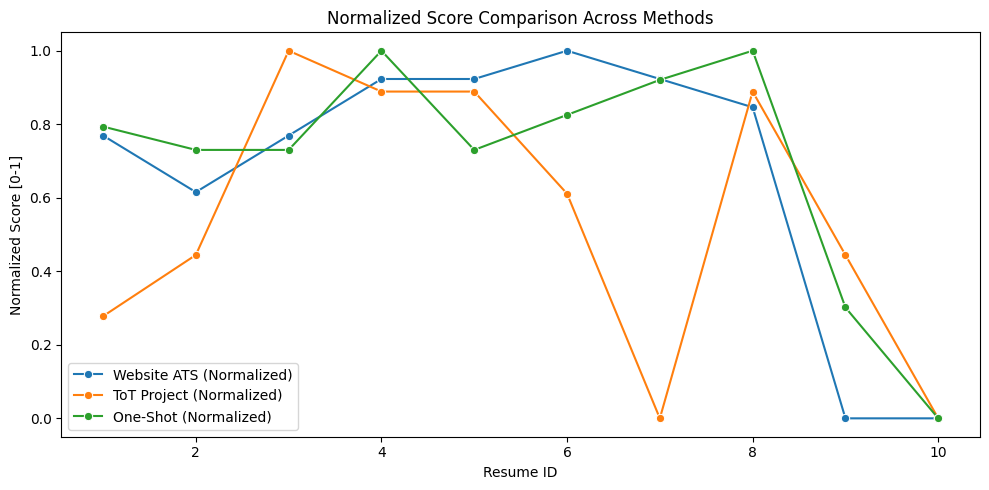

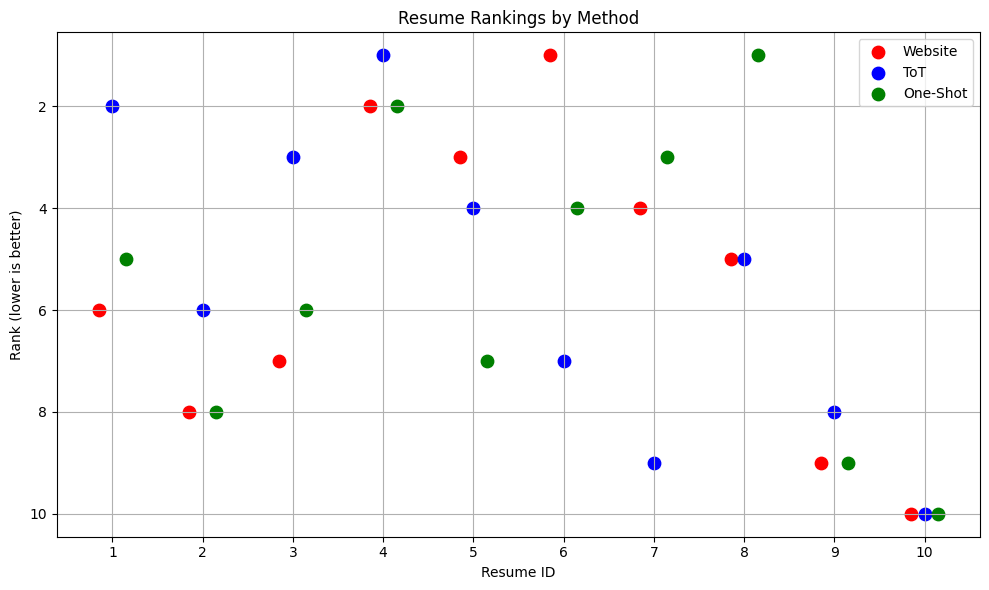

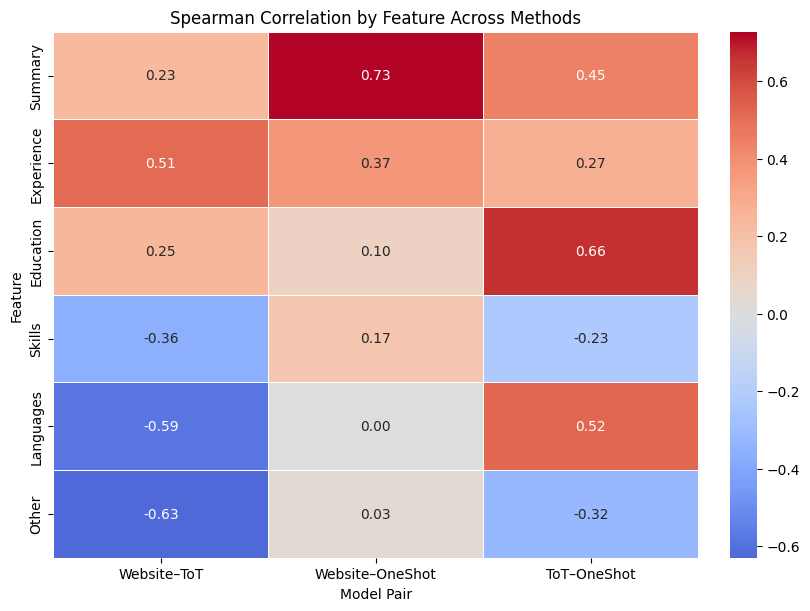

In [7]:
# Load and rank results for each method (Website ATS, Project ToT, One-Shot)
website_df = load_and_rank("ATS_Website_Results.xlsx", "website")
tot_df     = load_and_rank("ATS_Results.xlsx", "tot")
oneshot_df = load_and_rank("ATS_Oneshot_Results.xlsx", "oneshot")

ranking_comparison_df = merge_all_ranks(website_df, tot_df, oneshot_df)

# Plot 1: Scatter Plot of Project vs Website Rankings
plot_rank_scatter(ranking_comparison_df)

# Plot 2: Normalized Score Comparison
plot_normalized_score_comparison_all("ATS_Website_Results.xlsx", "ATS_Results.xlsx", "ATS_Oneshot_Results.xlsx")

# Plot 3: Resume Ranking by Method (Website vs ToT vs One-Shot)
plot_ranks_by_resume_scatter("ATS_Website_Results.xlsx", "ATS_Results.xlsx", "ATS_Oneshot_Results.xlsx")

# Plot 4: Spearman Correlation by Feature Across Methods
plot_featurewise_correlation("ATS_Website_Results.xlsx", "ATS_Results.xlsx", "ATS_Oneshot_Results.xlsx")
